In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [59]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [60]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [61]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


Here no data is null, thus no imputation shall be done


*   All IDs and name are unique, 4 regions and variety of SignupDate





In [62]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [63]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [64]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [65]:
products.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [66]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [67]:
transactions['year'] = pd.DatetimeIndex(transactions['TransactionDate']).year
transactions['month'] = pd.DatetimeIndex(transactions['TransactionDate']).month

In [68]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,year,month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3


In [69]:
# transactions.TransactionDate = pd.to_datetime(transactions.TransactionDate)
# transactions.set_index('TransactionDate', inplace=True)

# transactions.resample('MS').sum()
# transactions["Date"] = pd.to_datetime(transactions["Date"])

In [70]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   year             1000 non-null   int32  
 8   month            1000 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 62.6+ KB


In [71]:
transactions.describe()

,Quantity,TotalValue,Price,year,month
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2.537000,689.995560,272.55407,2023.996000,6.288000
std,1.117981,493.144478,140.73639,0.063151,3.437859
min,1.000000,16.080000,16.08000,2023.000000,1.000000
25%,2.000000,295.295000,147.95000,2024.000000,3.000000
50%,3.000000,588.880000,299.93000,2024.000000,6.000000
75%,4.000000,1011.660000,404.40000,2024.000000,9.000000
max,4.000000,1991.040000,497.76000,2024.000000,12.000000


Text(0.5, 1.0, 'Distribution of Year')

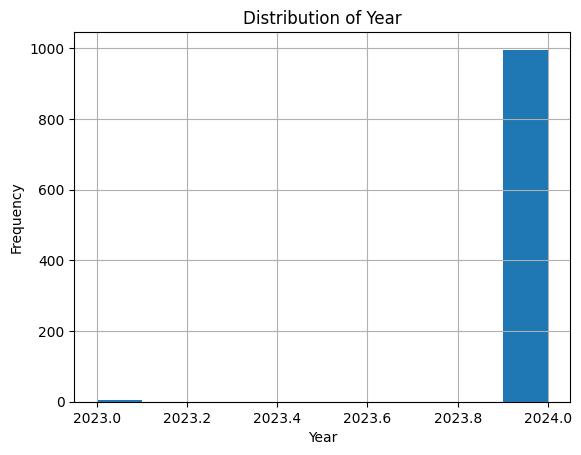

In [72]:
transactions['year'].hist()

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')

Here We can see that 2023 dates are very rare, so for analysing over the distribution of months, we'll neglect those of 2023, cause it may lead to wrongly decisions making.

In [73]:
transactions_filtered = transactions[transactions['year'] != 2023]
transactions_filtered.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,year,month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3


In [74]:
monthly_sales = transactions_filtered.groupby('month').agg({'TotalValue': 'sum'}).reset_index()
monthly_sales

,month,TotalValue
0,1,66376.39
1,2,51459.27
2,3,47828.73
3,4,57519.06
4,5,64527.74
5,6,48771.18
6,7,71366.39
7,8,63436.74
8,9,70603.75
9,10,47063.22


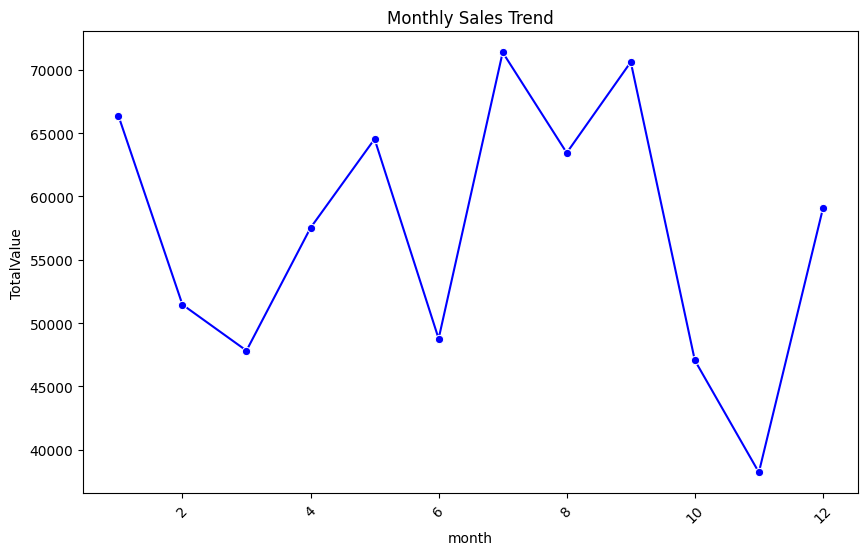

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='TotalValue', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

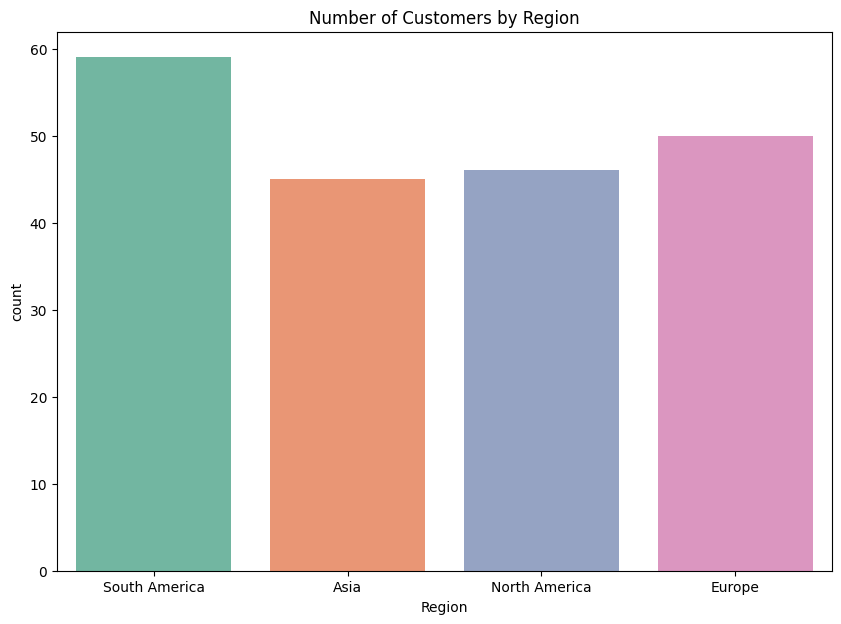

In [76]:
plt.figure(figsize=(10, 7))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Number of Customers by Region')
plt.show()

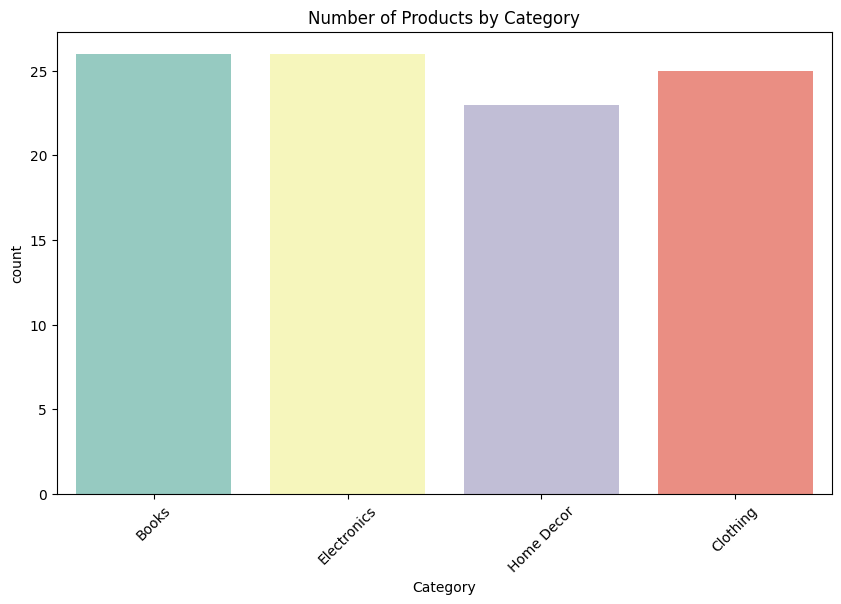

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', palette='Set3')
plt.title('Number of Products by Category')
plt.xticks(rotation=45)
plt.show()

A Few Take away from the graphs so far are:
1. Transaction data is not evenly distributed, which is there are few samples of 2023 data and more of 2024
2. No. of transactions take a s**harp dip from september(9) to november(11)** and also a **sharp rise from november(11) to december(12)**
3. **Home decor is the least** sold product by category whereas **Books and Electronics are most sold**.
4. **Most No. of customers resides in South America**

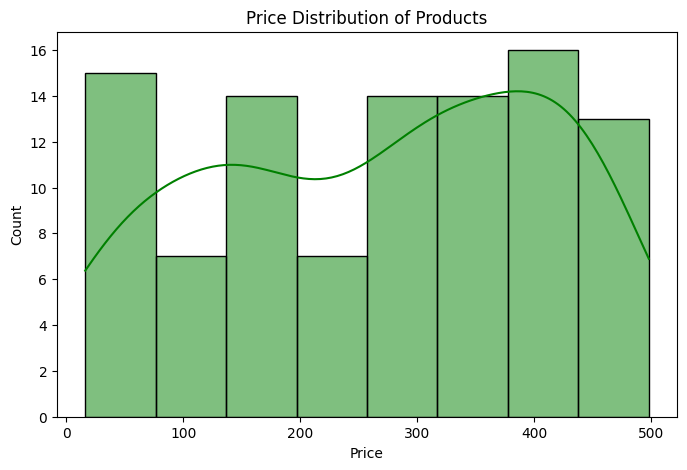

In [78]:
#price distribution graph
plt.figure(figsize=(8, 5))
sns.histplot(data=products, x='Price', kde=True, color='green')
plt.title('Price Distribution of Products')
plt.show()

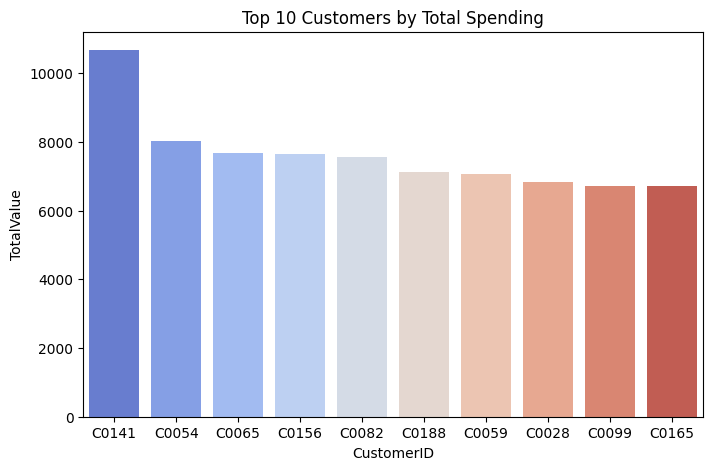

In [79]:
top_customers = (
    transactions.groupby('CustomerID')
    .agg({'TotalValue': 'sum'})
    .sort_values(by='TotalValue', ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='coolwarm')
plt.title('Top 10 Customers by Total Spending')
plt.show()

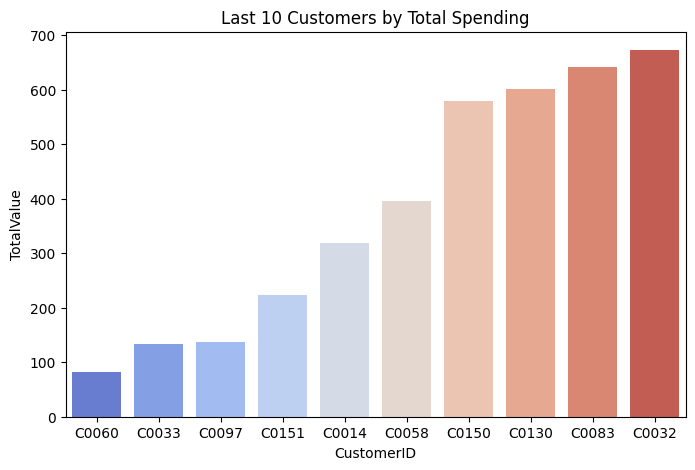

In [82]:
last_customers = (
    transactions.groupby('CustomerID')
    .agg({'TotalValue': 'sum'})
    .sort_values(by='TotalValue')
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=last_customers, x='CustomerID', y='TotalValue', palette='coolwarm')
plt.title('Last 10 Customers by Total Spending')
plt.show()

Here we can see that the spending of customers is not evenly distributed where the top spending customer spends around 10000+ and the least one spends <100.
**From bussiness perspective we can say that we should make our policies such that we attract and keep our most spending customers with us and make the least spending customer experience good such that it engages more from us.**